In [2]:
# predict which theme ...
import pandas as pd
import numpy as np

In [3]:
# read data -- sets
setsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile)
#sets.head()

In [4]:
themefile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/themes.csv'
themes = pd.read_csv(themefile)
#themes.head()

In [5]:
setsinvenfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventory_sets.csv'
invenotry_sets = pd.read_csv(setsinvenfile)

In [6]:
invenfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventories.csv'
invenotries = pd.read_csv(invenfile)
#invenotries.head()

In [7]:
invenpartsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventory_parts.csv'
invenotry_parts = pd.read_csv(invenpartsfile)

In [8]:
partsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/parts.csv'
parts = pd.read_csv(partsfile)
#parts.head()

In [9]:
#join sets and themes together
t1 = pd.merge(sets,themes, left_on = 'theme_id', right_on = 'id', suffixes = ('_set','_theme'))

In [10]:
# join t1 with ivnetories, inventoryset inventory parts
t4 = pd.merge(t1,invenotry_sets, on = 'set_num')
t4.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id,quantity
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1
1,6041-1,Armor Shop,1986,199,113,199,Lion Knights,186.0,2216,1
2,10000-1,Guarded Inn,2001,186,256,186,Castle,NaN,7474,1
3,10039-1,Black Falcon's Fortress,2002,186,431,186,Castle,NaN,7474,1
4,1794-1,Dragon Master Chariot,1994,186,36,186,Castle,NaN,5097,1


In [11]:
# then join parts and color and categories, and then join sets with them

#join t2 with color (t2 join inventory and inventory join color)
t3 = pd.merge(parts, invenotry_parts, on = 'part_num')
# drop useless columns
t3.head()

,part_num,name,part_cat_id,inventory_id,color_id,quantity,is_spare
0,0687b1,Set 0687 Activity Booklet 1,17,15235,9999,1,f
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1,f
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1973,2,1,f
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1,f
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,1973,2,1,f


In [12]:
t5 = pd.merge(t4, t3, left_on = 'id', right_on = 'inventory_id', how = 'inner',suffixes = ('_inven','_parts'))
t5.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


# how have the size of set changed over time?



In [13]:
## select part_num, nset_num, setname and year 
partdf = t5.filter(['part_num','set_num', 'year'], axis=1)
part1 = partdf.groupby(["year", "set_num"]).size().reset_index(name="num_of_parts")
print(part1.head())
partm = part1

   year set_num  num_of_parts
0  1970   603-3             6
1  1980  1062-1             1
2  1981  1064-1             1
3  1981   322-1             6
4  1981  6611-1           138


In [14]:
# count the size of parts based on year
part2 = part1.drop(part1.columns[[1]], axis=1)
n1 = part2.groupby('year')['num_of_parts'].sum()
part3 = partm.drop(part1.columns[[2]], axis=1)
n2 = partm.groupby('year')['set_num'].size()

n1 = n1.to_frame().reset_index()
n2 = n2.to_frame().reset_index()
print(n1.head())
print(n2.head())
print(len(n1))
print(len(n2))

# average parts in each set
#T1 = n1.merge(n1, on = 'year')
average = n1['num_of_parts'].div(n2['set_num'], axis=0)
print(average)

d = {'year': n1['year'], 'average': average}
averagedata = pd.DataFrame(data=d)
averagedata.head()

   year  num_of_parts
0  1970             6
1  1980             1
2  1981           500
3  1983            59
4  1984           159
   year  set_num
0  1970        1
1  1980        1
2  1981        6
3  1983        2
4  1984        2
38
38
0       6.000000
1       1.000000
2      83.333333
3      29.500000
4      79.500000
5      42.000000
6      28.666667
7      25.666667
8      45.000000
9      44.222222
10     42.250000
11     72.000000
12     41.500000
13     58.636364
14    106.500000
15    148.000000
16     53.000000
17    109.571429
18     24.317073
19     89.888889
20     38.340426
21     82.500000
22     89.926829
23     75.021505
24     78.873418
25    241.598039
26     83.403846
27    141.941176
28    116.194030
29     60.500000
30     49.333333
31     64.156716
32     56.662722
33     44.378571
34     26.000000
35     17.486111
36     30.666667
37    108.000000
dtype: float64


,average,year
0,6.000000,1970
1,1.000000,1980
2,83.333333,1981
3,29.500000,1983
4,79.500000,1984


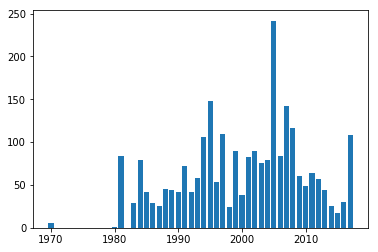

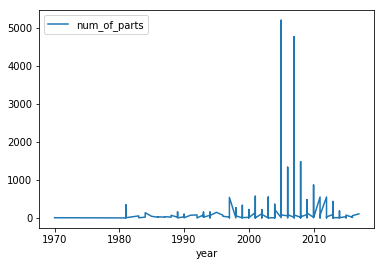

In [19]:
# draw plot
import matplotlib.pyplot as plt
%matplotlib inline

x = averagedata['year']
y = averagedata['average']
plt.bar(x,y)

#set to index 
part3 = part2.set_index('year')
part3.plot()

In [20]:
# try to draw the graph that can zoom in and out

# Could you predict which theme a set is from just by the bricks it contains? 

In [21]:
# using size of parts in set to predict which theme is belongs
df_q3 = t5.groupby(["name_theme"]).size().reset_index(name="num_of_parts")
print(df_q3.head())

       name_theme  num_of_parts
0              9V           168
1  Advent Sub-Set          2640
2         Airport           423
3         Animals            33
4  Aquaraiders II            13


<Container object of 149 artists>

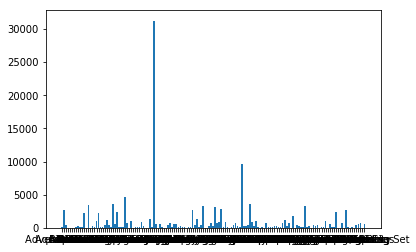

In [22]:
# count parts
import matplotlib.pyplot as plt
x = df_q3['name_theme']
y = df_q3['num_of_parts']
plt.bar(x,y)


In [23]:
# check the distribution of # of parts

(array([121.,  10.,   5.,   7.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([1.00000000e+00, 8.68833333e+02, 1.73666667e+03, 2.60450000e+03,
        3.47233333e+03, 4.34016667e+03, 5.20800000e+03, 6.07583333e+03,
        6.94366667e+03, 7.81150000e+03, 8.67933333e+03, 9.54716667e+03,
        1.04150000e+04, 1.12828333e+04, 1.21506667e+04, 1.30185000e+04,
        1.38863333e+04, 1.47541667e+04, 1.56220000e+04, 1.64898333e+04,
        1.73576667e+04, 1.82255000e+04, 1.90933333e+04, 1.99611667e+04,
        2.08290000e+04, 2.16968333e+04, 2.25646667e+04, 2.34325000e+04,
        2.43003333e+04, 2.51681667e+04, 2.60360000e+04, 2.69038333e+04,
        2.77716667e+04, 2.86395000e+04, 2.95073333e+04, 3.03751667e+04,
        3.12430000e+04]),
 <a list of 36 Patch objects>)

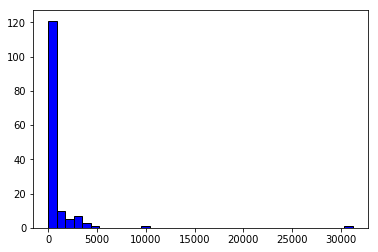

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_q3['num_of_parts'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

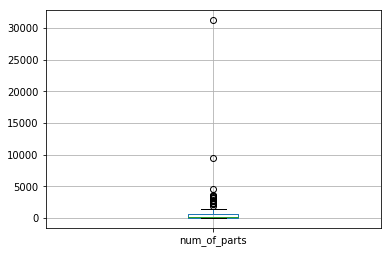

In [25]:
# box plot of Number of parts to check if there is outliers
df_q3.boxplot(column = ['num_of_parts'])

In [26]:
# check why one set can have 30000 parts
df_q3.sort_values("num_of_parts", inplace=True, ascending=False)
df_q3.head()

# check what is going on with the name_theme Fire in the original data
test1 = t5[t5['name_theme']=='Fire']
#test1.head()
print(len(test1)) # the set Fire actually have over 30000 parts
print(test1.head())

# check how may sets fire contains
len(test1['name_set'].unique())



31243
      set_num            name_set  year  theme_id  num_parts  id name_theme  \
18921  1702-1  Fire Fighter 4 x 4  1994        74         59  74       Fire   
18922  1702-1  Fire Fighter 4 x 4  1994        74         59  74       Fire   
18923  1702-1  Fire Fighter 4 x 4  1994        74         59  74       Fire   
18924  1702-1  Fire Fighter 4 x 4  1994        74         59  74       Fire   
18925  1702-1  Fire Fighter 4 x 4  1994        74         59  74       Fire   

       parent_id  inventory_id_inven  quantity_inven part_num  \
18921       67.0               11175               1    2412b   
18922       67.0               11175               1     2420   
18923       67.0               11175               1     2431   
18924       67.0               11175               1     2444   
18925       67.0               11175               1     2445   

                                                    name  part_cat_id  \
18921       Tile Special 1 x 2 Grille with Bottom Groov

21

In [27]:
# group # of parts in each set
testn = test1[['name_set','num_parts']]
testnew = testn.groupby('name_set').size().sort_values(ascending=False) \
  .reset_index(name='Sum_of_parts')
print(testnew)
print(sum(testnew['Sum_of_parts']))

                          name_set  Sum_of_parts
0                         Fire Car          5208
1             Off-Road Fire Rescue          4774
2                       Fire Truck          4547
3                  Fire Helicopter          4340
4                     Fire Station          4340
5                  Fire Hovercraft          2170
6   Off-Road Fire Truck & Fireboat           868
7                         Fireboat           868
8                      Firefighter           868
9                       Fire Plane           434
10                 Fire Motorcycle           434
11                     Fire Rescue           434
12                       Fire Boat           434
13                        Fire ATV           434
14         City Fire Accessory Set           434
15                4 × 4 Fire Truck           434
16                Fire Chief's Car           138
17              Fire Fighter 4 x 4            69
18                      Fire Chief             9
19                  

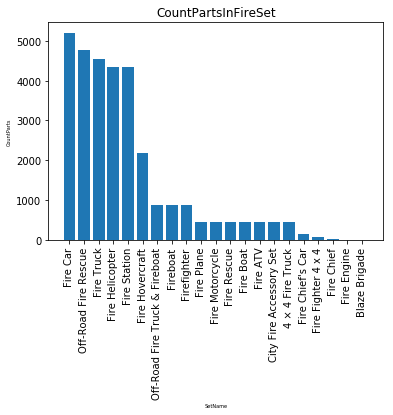

In [28]:
# draw this result
index = np.arange(len(testnew['name_set']))
sumparts = testnew['Sum_of_parts']
label = testnew['name_set']
plt.bar(index, sumparts)
plt.xlabel('SetName', fontsize=5)
plt.ylabel('CountParts', fontsize=5)
plt.xticks(index, label, fontsize=10, rotation=90)
plt.title('CountPartsInFireSet')
plt.show()

In [29]:
# list the part name and number of part in "fire" theme
testAgain = test1.groupby(["num_parts"]).size().reset_index(name="count")


In [30]:
testAgain.head()

,num_parts,count
0,20,138
1,25,868
2,26,9
3,39,572
4,43,434


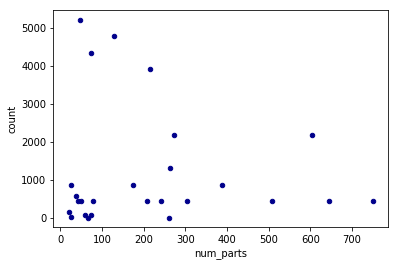

In [31]:
# draw scatter plot
testAgain.plot.scatter(x='num_parts',y='count',c='DarkBlue')

# if delete rows > 5000, see what happened?

In [32]:
r1 = df_q3[df_q3['num_of_parts']<=250]
len(r1)

80

(array([7., 9., 3., 4., 5., 1., 1., 2., 3., 5., 4., 0., 4., 2., 3., 1., 0.,
        4., 1., 1., 1., 0., 3., 0., 2., 4., 3., 0., 0., 0., 0., 2., 1., 2.,
        0., 2.]),
 array([  1.        ,   7.63888889,  14.27777778,  20.91666667,
         27.55555556,  34.19444444,  40.83333333,  47.47222222,
         54.11111111,  60.75      ,  67.38888889,  74.02777778,
         80.66666667,  87.30555556,  93.94444444, 100.58333333,
        107.22222222, 113.86111111, 120.5       , 127.13888889,
        133.77777778, 140.41666667, 147.05555556, 153.69444444,
        160.33333333, 166.97222222, 173.61111111, 180.25      ,
        186.88888889, 193.52777778, 200.16666667, 206.80555556,
        213.44444444, 220.08333333, 226.72222222, 233.36111111,
        240.        ]),
 <a list of 36 Patch objects>)

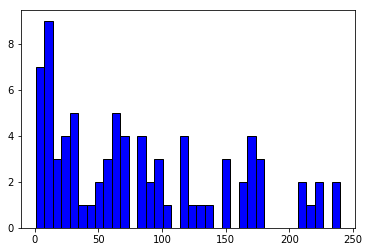

In [33]:
plt.hist(r1['num_of_parts'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# the number of parts in theme is not normal distribution 

# Naive Bayes

In [34]:
# try to use part name to predict the theme 

In [35]:
my_df = t5[['name_theme','name']]

In [36]:
len(my_df['name_theme'].unique())

149

In [37]:
my_df.head()

,name_theme,name
0,Lion Knights,Technic Pin Connector Hub with 2 Perpendicular...
1,Lion Knights,Hero Factory Armour with Spikes
2,Lion Knights,Bionicle Zamor Sphere with Marbled White / Blu...
3,Lion Knights,Hero Factory Full Torso Armor with Connector f...
4,Lion Knights,Large Figure Head Modified Chima Mammoth with ...


In [38]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# become the predictor is categorical, convert it to number by using label encoder 
number = LabelEncoder()
my_df['name'] = number.fit_transform(my_df['name'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# ready to create a model
features = ["name"]
target = "name_theme"


In [41]:
# create train and test set 
features_train, features_test, target_train, target_test = train_test_split(my_df[features],my_df[target],test_size = 0.33,random_state = 54)


In [42]:
# now create the model
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None)

In [43]:
# predict on test
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)
print(accuracy)

0.24659041967746567


In [44]:
# check the frequncy table

import numpy as np
import pandas as pd
import os

In [45]:
# build frequncy table
Pname_Tname = pd.crosstab(index=my_df["name"], 
                            columns=my_df["name_theme"],
                             margins=True)
Pname_Tname

name_theme,9V,Advent Sub-Set,Airport,Animals,Aquaraiders II,Arctic,Atlantis,Barraki,Basic,Basic Set,...,Train,Turaga,Ultra Agents,Universal Building Set,Vahki,Villains,Visorak,Wolfpack,World City,All
name,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [46]:
# probability Table
Pname_Tname/Pname_Tname.ix["All","All"]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


name_theme,9V,Advent Sub-Set,Airport,Animals,Aquaraiders II,Arctic,Atlantis,Barraki,Basic,Basic Set,...,Train,Turaga,Ultra Agents,Universal Building Set,Vahki,Villains,Visorak,Wolfpack,World City,All
name,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000008
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000261
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000261
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000071


In [47]:
# naive bayes is not a good way to apply to this problem. 

# What sets have the rarest pieces in them? 

In [48]:
# what is the rarest pieces in each sets?
# group by set, show part names
t5.head()


,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


In [49]:
dflast = t5[['name_set','part_num','name']]

In [50]:
type(dflast)
#dflast = dflast.to_frame().reset_index()

pandas.core.frame.DataFrame

In [51]:
dflast.head()

,name_set,part_num,name
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...
1,Knights' Arsenal,11334,Hero Factory Armour with Spikes
2,Knights' Arsenal,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...
3,Knights' Arsenal,15366,Hero Factory Full Torso Armor with Connector f...
4,Knights' Arsenal,15376pat01,Large Figure Head Modified Chima Mammoth with ...


In [52]:
# 在一个set中出现，在别的set中都没出现的part
# check if a value exist in dictionary once , return their key and value pair 
# draw their name and import picture of these parts 
rarest = dflast.name.unique()


In [53]:
len(rarest)

2247

In [54]:
dflast['freq'] = dflast.groupby('name')['name'].transform('count')
dflast.sort_values('freq')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name_set,part_num,name,freq
95903,Enchanted Island,3626cpr0937,"Minifig Head Black Eyebrows, Cheek Lines, Blac...",1
96101,Harbor Sentry,60639c02,"Arm Troll, Right with Pearl Dark Gray Wristband",1
655,Large Wheels and Axles,6538a,Technic Axle Connector Ridged [with + Hole + O...,1
96093,Harbor Sentry,59227pr03,Dragon Head Lower Jaw with White Teeth Print [...,1
96092,Harbor Sentry,59225c01,Serpent Neck S-Curve with Moveable Ball Joint Pin,1
658,Large Wheels and Axles,75c11,"Hose, Rigid 3mm D. 11L / 8.8cm",1
95895,Enchanted Island,30552,Hinge Cylinder 1 x 2 Locking with 1 Finger and...,1
96091,Harbor Sentry,59224pat0003,Dragon Torso (Fantasy Era) with Metallic Silve...,1
96090,Harbor Sentry,59218pat01,Dragon Arm with Black Claws - Right,1
96089,Harbor Sentry,59217pat01,Dragon Arm with Black Claws - Left,1


In [55]:
dflast.head()

,name_set,part_num,name,freq
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...,9
1,Knights' Arsenal,11334,Hero Factory Armour with Spikes,2
2,Knights' Arsenal,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,2
3,Knights' Arsenal,15366,Hero Factory Full Torso Armor with Connector f...,2
4,Knights' Arsenal,15376pat01,Large Figure Head Modified Chima Mammoth with ...,2


In [56]:
dflast = dflast[dflast['freq'] == 1]
len(dflast)
# there is 229 unique parts in all sets. same with rarest = dflast.name.unique() results.

229

In [57]:
dflast.head()

,name_set,part_num,name,freq
607,Large Wheels and Axles,2536,"Plant Tree Palm Trunk - Short Connector, no Ax...",1
609,Large Wheels and Axles,2711,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs...",1
610,Large Wheels and Axles,2717,Technic Seat [3 x 2 Base],1
614,Large Wheels and Axles,2952,Propeller 2 Blade 9 Diameter,1
628,Large Wheels and Axles,3650c,Technic Gear 24 Tooth Crown with Reinforcement...,1


In [58]:
dflast.to_csv('q3.csv')